In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import os

for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\umairansari\Desktop\New folder (2)\Dataset\base_submisson.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\base_submisson_with_fe_dt_time.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\pet adoption base submission(2).ipynb
C:\Users\umairansari\Desktop\New folder (2)\Dataset\pets classification with multiple models.ipynb
C:\Users\umairansari\Desktop\New folder (2)\Dataset\test.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\test_mod.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\train.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\train_mod.csv
C:\Users\umairansari\Desktop\New folder (2)\Dataset\.ipynb_checkpoints\pet adoption base submission(2)-checkpoint.ipynb
C:\Users\umairansari\Desktop\New folder (2)\Dataset\.ipynb_checkpoints\pets classification with multiple models-checkpoint.ipynb


In [28]:
train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [29]:
train.shape,test.shape

((18834, 11), (8072, 9))

In [30]:
train.columns,test.columns

(Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
        'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
        'pet_category'],
       dtype='object'),
 Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
        'length(m)', 'height(cm)', 'X1', 'X2'],
       dtype='object'))

In [31]:
train.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
pet_id            18834 non-null object
issue_date        18834 non-null object
listing_date      18834 non-null object
condition         17357 non-null float64
color_type        18834 non-null object
length(m)         18834 non-null float64
height(cm)        18834 non-null float64
X1                18834 non-null int64
X2                18834 non-null int64
breed_category    18834 non-null float64
pet_category      18834 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [33]:
#changing it to datye time train
train["issue_date"]=pd.to_datetime(train["issue_date"],format='%Y-%m-%d')
train["listing_date"]=pd.to_datetime(train["listing_date"],format='%Y-%m-%d')


#changing it to datye time test
test["issue_date"]=pd.to_datetime(test["issue_date"],format='%Y-%m-%d')
test["listing_date"]=pd.to_datetime(test["listing_date"],format='%Y-%m-%d')

#date difference between  
train["days_stayed"]=train["listing_date"]-train["issue_date"]
test["days_stayed"]=test["listing_date"]-test["issue_date"]



In [34]:
#making the days features
# train["days_stayed"]=train["days_stayed"].str.replace("days","-")
# test["days_stayed"]=test["days_stayed"].str.replace("days","-")

#getting the days from the difference time
train["total_days_stayed"]=train["days_stayed"].dt.days
test["total_days_stayed"]=test["days_stayed"].dt.days

#getting the hours from the date
train["total_hours_stayed"]=round(((train["days_stayed"].dt.seconds)/60)/60,2)
test["total_hours_stayed"]=round(((test["days_stayed"].dt.seconds)/60)/60,2)


In [35]:
def unique_values(dataframe):
    column_names=dataframe.columns
    for col in column_names:
        print("name is {} and unique values are {}".format(col,len(dataframe[col].unique())))
        
unique_values(train)

name is pet_id and unique values are 18834
name is issue_date and unique values are 3907
name is listing_date and unique values are 17209
name is condition and unique values are 4
name is color_type and unique values are 56
name is length(m) and unique values are 101
name is height(cm) and unique values are 4425
name is X1 and unique values are 20
name is X2 and unique values are 10
name is breed_category and unique values are 3
name is pet_category and unique values are 4
name is days_stayed and unique values are 16978
name is total_days_stayed and unique values are 2709
name is total_hours_stayed and unique values are 904


In [36]:
#missing conditions flag column for test and train
train["condition_is_missing"]=train["condition"].isnull()
test["condition_is_missing"]=test["condition"].isnull()

#filling missing values in the conditions
train["condition"].fillna(-1,inplace=True)
test["condition"].fillna(-1,inplace=True)

In [37]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days_stayed,total_days_stayed,total_hours_stayed,condition_is_missing
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73 days 16:25:00,73,16.42,False
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862 days 17:47:00,1862,17.78,False
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,-1.0,Brown,0.15,40.90,15,4,2.0,4,752 days 08:24:00,752,8.40,True
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755 days 18:30:00,755,18.50,False
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52 days 09:38:00,52,9.63,False


In [38]:
train.isna().sum().sum(),test.isna().sum().sum()

(0, 0)

In [39]:
train["condition_is_missing"]=np.where(train["condition_is_missing"]==True,1,0)
test["condition_is_missing"]=np.where(test["condition_is_missing"]==True,1,0)
# test["condition_is_missing"]=test["condition_is_missing"].map({'True':1,'False':0})

In [40]:
train.to_csv("train_mod.csv",index=False)
test.to_csv("test_mod.csv",index=False)


In [41]:
train.isna().sum().sum()

0

In [42]:
# sns.pairplot(train.iloc[:,2:])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text xticklabel objects>)

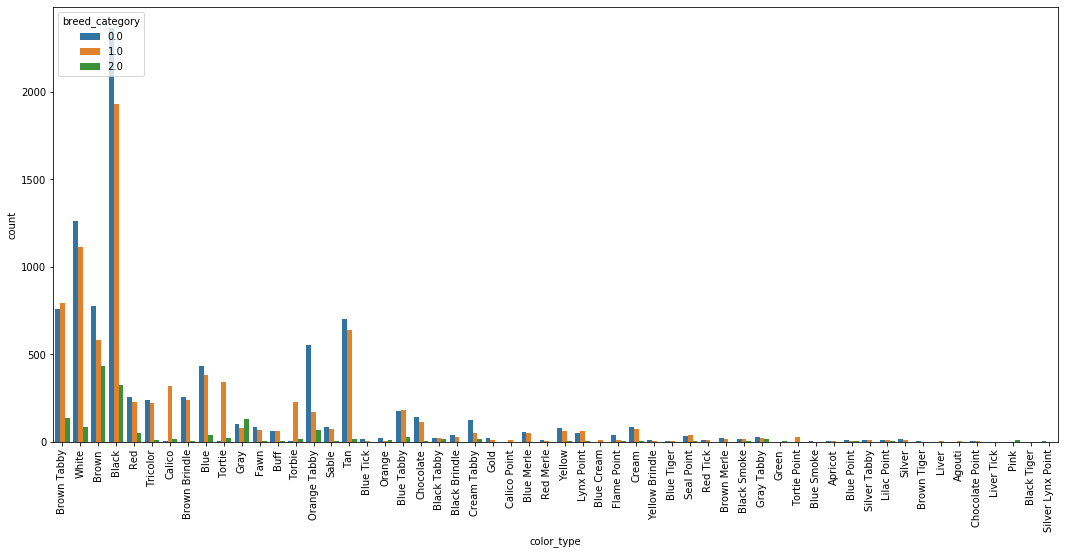

In [43]:
plt.figure(figsize=(18,8))
# color_count["color_type"].plot(kind="hist")
sns.countplot(train["color_type"],hue=train["breed_category"])
plt.xticks(rotation=90)

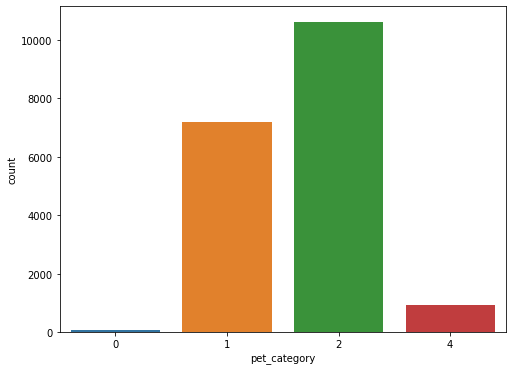

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(train["pet_category"])
# plt.yticks(ticks=np.arange(0,12000,50))

In [45]:
train["pet_category"].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

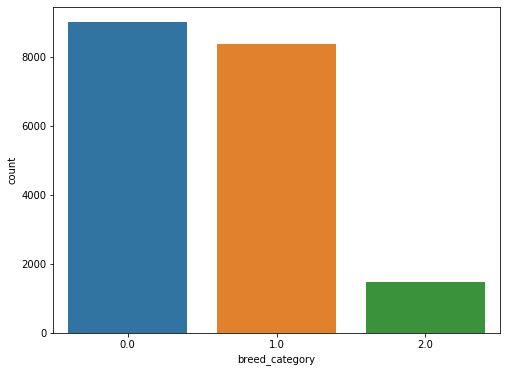

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(train["breed_category"])


In [47]:
train["breed_category"].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [48]:
#label encoding the features for the modelling process
le=LabelEncoder()
le.fit(train["color_type"])
# train["color_type"]=le.fit_transform(train["color_type"])
train["color_type"]=le.transform(train["color_type"])
test["color_type"]=le.transform(test["color_type"])


In [49]:
train.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category', 'pet_category',
       'days_stayed', 'total_days_stayed', 'total_hours_stayed',
       'condition_is_missing'],
      dtype='object')

In [50]:
#splitting into test and train
x_train=train.drop(['pet_id', 'issue_date', 'listing_date','breed_category', 'pet_category','days_stayed'],axis=1)
y_train_pet_category=train["pet_category"]
y_train_breed_category=train["breed_category"]

#test dataframe for base submission
x_test=test.drop(['pet_id', 'issue_date', 'listing_date','days_stayed'],axis=1)
#modelling for base submission

rfc=RandomForestClassifier()
rfc1=RandomForestClassifier()
rfc.fit(x_train,y_train_pet_category)
rfc1.fit(x_train,y_train_breed_category)
predicted_rfc_pc=rfc.predict(x_test)
predicted_rfc_bc=rfc1.predict(x_test)

In [51]:
x_train.columns

Index(['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2',
       'total_days_stayed', 'total_hours_stayed', 'condition_is_missing'],
      dtype='object')

In [52]:
id=pd.Series(test["pet_id"])
submission=pd.DataFrame({'pet_id':id,'breed_category':predicted_rfc_bc,'pet_category':predicted_rfc_pc})
submission.to_csv("base_submisson_with_fe_dt_time.csv",index=False)